In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mysg # Tom Robitaille's YSO grid tool
from astropy.table import Table

from astropy.io import fits
from astropy import units as u, constants
import pylab as pl
import requests

from icemodels import absorbed_spectrum, absorbed_spectrum_Gaussians, convsum, fluxes_in_filters, load_molecule, atmo_model, molecule_data
del molecule_data['h2o_b']

from astropy.visualization import simple_norm


In [2]:
cd ../smart-plotters

/blue/adamginsburg/savannahgramze/cloudc/smart-plotters/smart-plotters


In [3]:
from jwst_plots import JWSTCatalog, make_cat_use
from glimpse_plots import GlimpseCatalog
from cutout_plot import Cutout

In [4]:
cd ../notebooks

/blue/adamginsburg/savannahgramze/cloudc/smart-plotters/notebooks


In [5]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg
from dust_extinction.parameter_averages import CCM89
from astroquery.svo_fps import SvoFps


# Catalogs

In [6]:
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import regions

In [9]:
coord_BC2 = SkyCoord(3.0970501246, 0.3112008170, unit=(u.deg, u.deg), frame='galactic')
width = 42*u.arcmin
length = 40*u.arcmin
reg_BC2 = regions.RectangleSkyRegion(center=coord_BC2, width=width, height=length, angle=0*u.deg)
reg_BC2 = regions.CircleSkyRegion(center=coord_BC2, radius=20*u.arcmin)

In [10]:
coord_ex1 = SkyCoord(3.4252417355, -0.3517656680, unit=(u.deg, u.deg), frame='galactic')
rad_ex1 = 7*u.arcmin
reg_ex1 = regions.RectangleSkyRegion(center=SkyCoord(3.4252417355, -0.3517656680, unit=(u.deg, u.deg), frame='galactic'), width=7*u.arcmin, height=4*u.arcmin, angle=0*u.deg)

In [11]:
#cat_spitzer = GlimpseCatalog(Vizier.get_catalogs('II/293')[0])
Vizier.ROW_LIMIT = 1e6#2e5
#cat_spitzer = GlimpseCatalog(Vizier.query_region(coord_BC2, radius=20*u.arcmin, catalog='II/293')[0])
cat_spitzer = GlimpseCatalog(Vizier.query_region(coord_ex1, radius=rad_ex1, catalog='II/293')[0])

In [12]:
cat_spitzer.catalog 

<Table length=16300>
     GLIMPSE       RAJ2000    DEJ2000    C   ... e_5.8mag  8.0mag e_8.0mag
                     deg        deg          ...   mag      mag     mag   
      str17        float64    float64   str1 ... float32  float32 float32 
----------------- ---------- ---------- ---- ... -------- ------- --------
G003.3401-00.4310 268.755938 -26.289703    A ...       --      --       --
G003.3426-00.4332 268.759470 -26.288583    A ...       --      --       --
G003.3432-00.4342 268.760766 -26.288540    C ...    0.083  11.285    0.097
G003.3436-00.4334 268.760181 -26.287867    A ...    0.160      --       --
G003.3445-00.4355 268.762746 -26.288073    C ...    0.061  10.053    0.051
G003.3469-00.4331 268.761767 -26.284874    A ...       --      --       --
G003.3469-00.4351 268.763750 -26.285819    A ...       --      --       --
G003.3471-00.4374 268.766002 -26.286862    A ...       --      --       --
G003.3477-00.4377 268.766693 -26.286484    A ...       --      --       --
              ...        ...        ...  ... ...      ...     ...      ...
G003.5253-00.2937 268.728151 -26.060475    C ...    0.047   8.843    0.029
G003.5257-00.2975 268.731975 -26.062051    A ...       --      --       --
G003.5258-00.2970 268.731547 -26.061662    A ...       --      --       --
G003.5259-00.2938 268.728576 -26.059987    C ...    0.169  10.939    0.109
G003.5267-00.2949 268.730045 -26.059843    C ...       --      --       --
G003.5271-00.2960 268.731362 -26.060094    C ...    0.284      --       --
G003.5274-00.2974 268.732893 -26.060526    C ...       --      --       --
G003.5278-00.2964 268.732116 -26.059650    C ...       --      --       --
G003.5283-00.2976 268.733518 -26.059792    C ...    0.243      --       --

<Axes: xlabel='[K] - [3.6]', ylabel='[3.6] - [4.5]'>

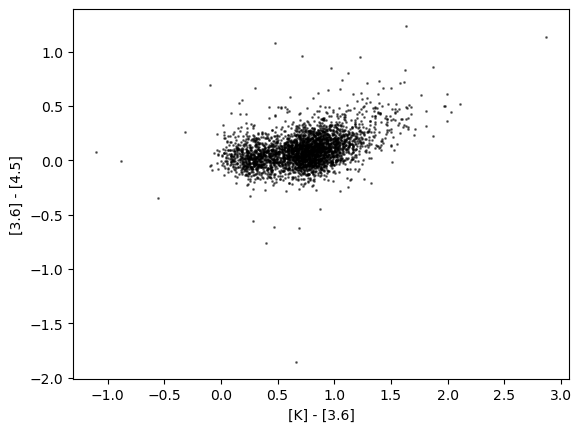

In [13]:
cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='k', alpha=0.5, s=1)

<Axes: xlabel='[K] - [3.6]', ylabel='[4.5] - [5.8]'>

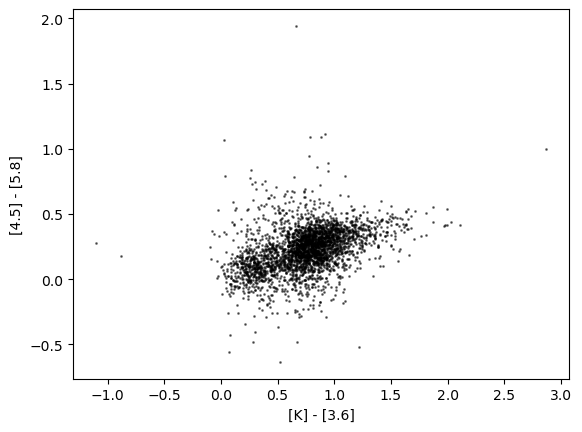

In [14]:
cat_spitzer.plot_CCD('K', '3.6', '4.5', '5.8', color='k', alpha=0.5, s=1)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: xlabel='[K] - [3.6]', ylabel='[4.5] - [5.8]'>

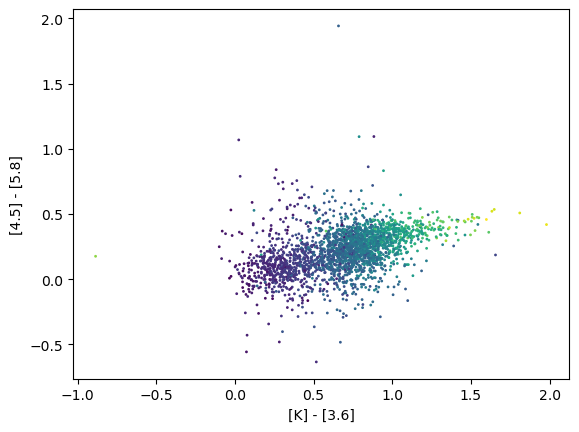

In [42]:
cat_spitzer.plot_CCD('K', '3.6', '4.5', '5.8', c=cat_spitzer.color('H', 'K'), s=1)

<Axes: xlabel='[4.5] - [5.8]', ylabel='[5.8] - [8.0]'>

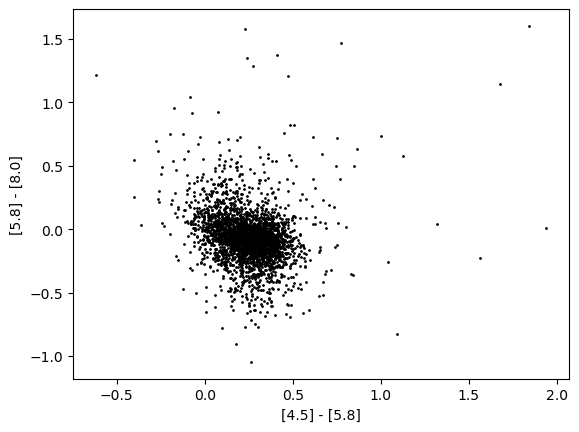

In [52]:
cat_spitzer.plot_CCD('4.5', '5.8', '5.8', '8.0', c='k', s=1)

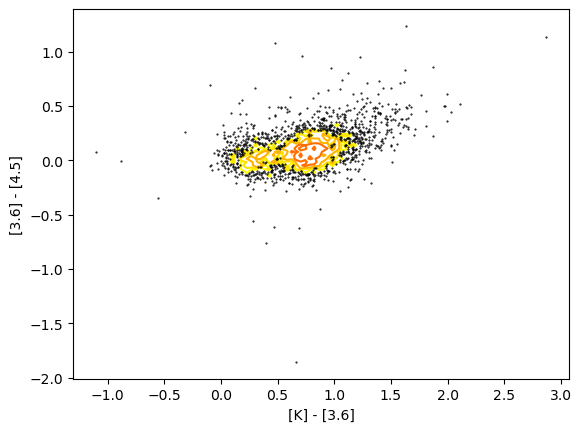

In [16]:
ax = plt.subplot()
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_spitzer.plot_contour_CCD('K', '3.6', '3.6', '4.5', threshold=5)
#ax.set_ylim(-2, 3)

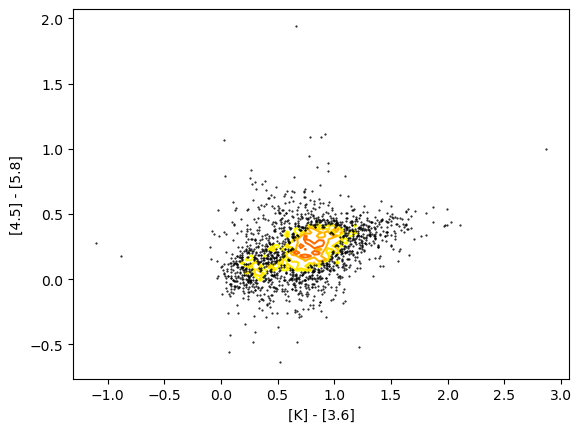

In [17]:
ax = plt.subplot()
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_spitzer.plot_contour_CCD('K', '3.6', '4.5', '5.8', threshold=5)
#ax.set_ylim(-2, 3)

/red/adamginsburg/repos/mpl_plot_templates/mpl_plot_templates/adaptive_param_plot.py:129: UserWarning: The following kwargs were not used by contour: 'markersize'
  con = axis.contour(cx,cy,H.T,levels=levels,norm=norm,cmap=cmap,**kwargs)


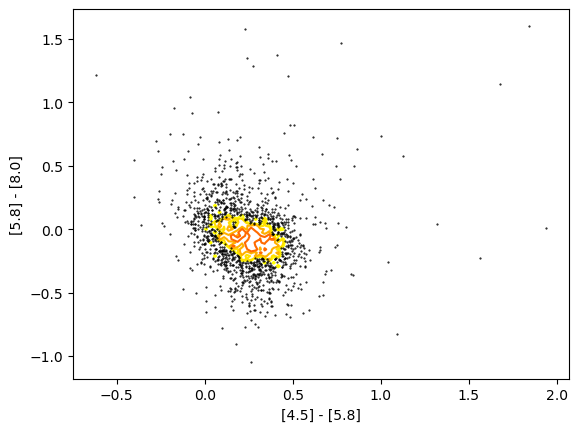

In [54]:
cat_spitzer.plot_contour_CCD('4.5', '5.8', '5.8', '8.0', color='k', threshold=5)

<Axes: xlabel='[3.6] - [5.8]', ylabel='[4.5] - [5.8]'>

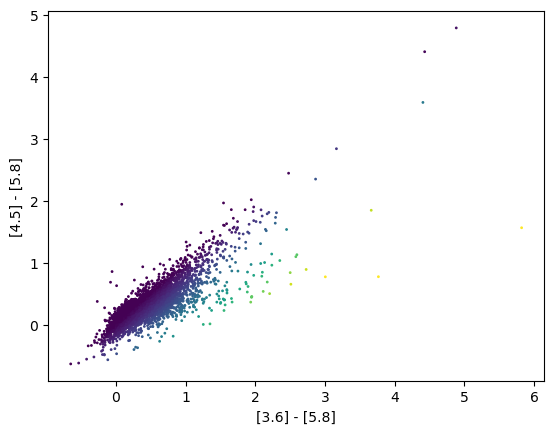

In [78]:
cat_spitzer.plot_CCD('3.6', '5.8', '4.5', '5.8', c=cat_spitzer.color('3.6', '4.5'), s=1, vmax=2, vmin=0)

<Axes: xlabel='[J] - [K]', ylabel='[J]'>

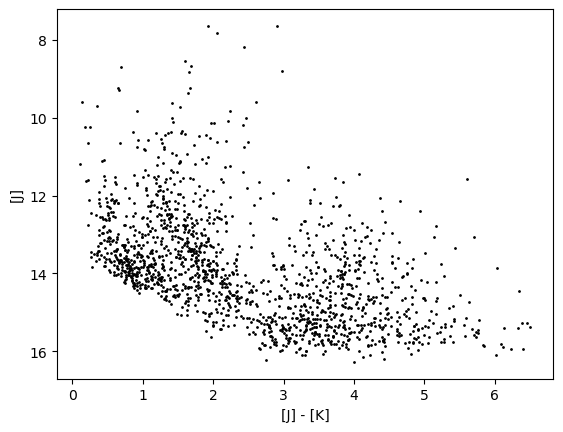

In [19]:
ax = plt.subplot()
cat_spitzer.plot_CMD('J', 'K', 'J', color='k', alpha=1, s=1, ax=ax)
#ax.set_xlim(2.5, 7)

<Axes: xlabel='[H] - [K]', ylabel='[H]'>

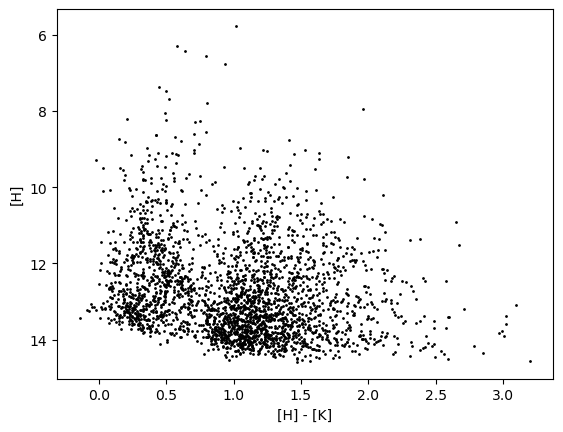

In [20]:
ax = plt.subplot()
cat_spitzer.plot_CMD('H', 'K', 'H', color='k', alpha=1, s=1, ax=ax)
#ax.set_xlim(2.5, 7)

In [36]:
color_cut = np.logical_or((cat_spitzer.color('H', 'K') > 0.), (cat_spitzer.band('H').mask))
color_cut = np.logical_or(color_cut, (cat_spitzer.band('K').mask))
cat_cut = GlimpseCatalog(cat_spitzer.catalog[color_cut])
#cat_cut.catalog

In [37]:
#bc2_cutout = Cutout(coord_BC2, l=width, w=length)
#bc2_cut = bc2_cutout.get_cutout('/orange/adamginsburg/cmz/galacticbar/bania2/spitzer/GLM_00300+0000_mosaic_I4.fits')
#cutout_reg = bc2_cutout.get_cutout_region(frame='galactic')
#cat_reg = GlimpseCatalog(cat_cut.catalog[cat_cut.get_region_mask([cutout_reg], bc2_cut.wcs)])

In [38]:
ex1_cutout = Cutout(coord_ex1, l=rad_ex1, w=rad_ex1)
ex1_cut = ex1_cutout.get_cutout('/orange/adamginsburg/cmz/galacticbar/bania2/spitzer/GLM_00300+0000_mosaic_I4.fits')
cutout_reg = ex1_cutout.get_cutout_region(frame='galactic')
cat_reg = GlimpseCatalog(cat_cut.catalog[cat_cut.get_region_mask([cutout_reg], ex1_cut.wcs)])

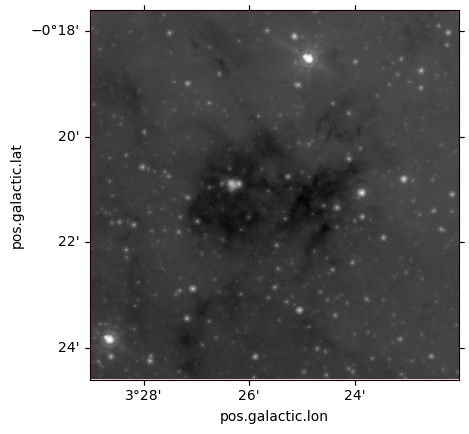

In [39]:
ax = plt.subplot(projection=ex1_cut.wcs)
ax.imshow(ex1_cut.data, origin='lower', cmap='gray', norm=simple_norm(ex1_cut.data, stretch='log', max_percent=99.99))
cutout_reg.to_pixel(ex1_cut.wcs).plot(ax=ax, edgecolor='red', facecolor='None')

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


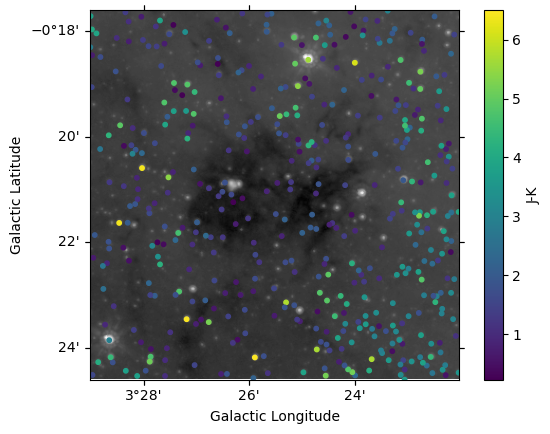

In [56]:
ax = plt.subplot(projection=ex1_cut.wcs)
ax.imshow(ex1_cut.data, origin='lower', cmap='gray', norm=simple_norm(ex1_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), s=10, c=cat_reg.color('J', 'K'), cmap='viridis')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='J-K')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

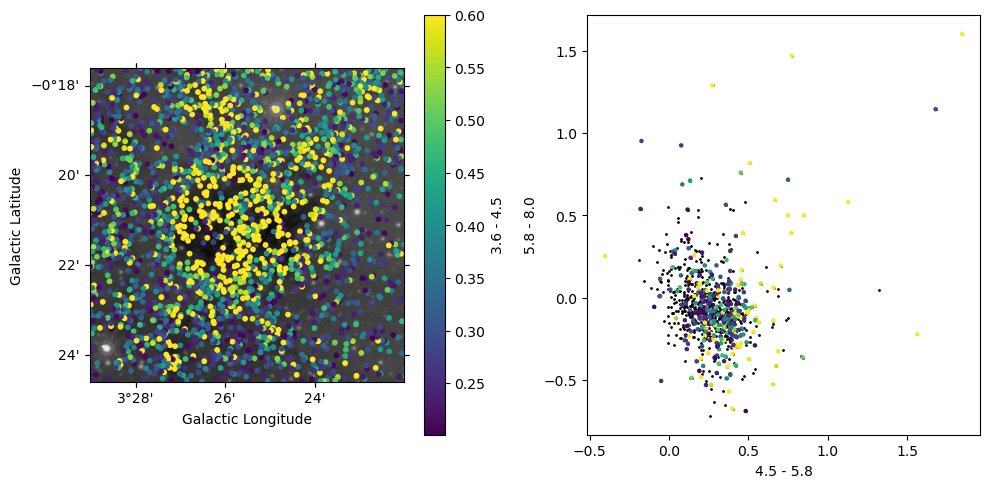

In [88]:
cut_1 = cat_reg.color('3.6', '4.5') > 0.2
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(121, projection=ex1_cut.wcs)
ax.imshow(ex1_cut.data, origin='lower', cmap='gray', norm=simple_norm(ex1_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l[cut_1], cat_reg.coords.galactic.b[cut_1], transform=ax.get_transform('world'), s=10, c=cat_reg.color('3.6', '4.5')[cut_1], cmap='viridis', vmax=0.6)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='3.6 - 4.5')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

ax = plt.subplot(122)
ax.scatter(cat_reg.color('4.5', '5.8'), cat_reg.color('5.8', '8.0'), s=1, color='k')#, c=cat_reg.color('H', 'K'), cmap='viridis', s=10)
ax.scatter(cat_reg.color('4.5', '5.8')[cut_1], cat_reg.color('5.8', '8.0')[cut_1], s=5, c=cat_reg.color('3.6', '4.5')[cut_1], vmax=0.6)#, c=cat_reg.color('H', 'K'), cmap='viridis', s=10)
ax.set_xlabel('4.5 - 5.8')
ax.set_ylabel('5.8 - 8.0')

plt.tight_layout()

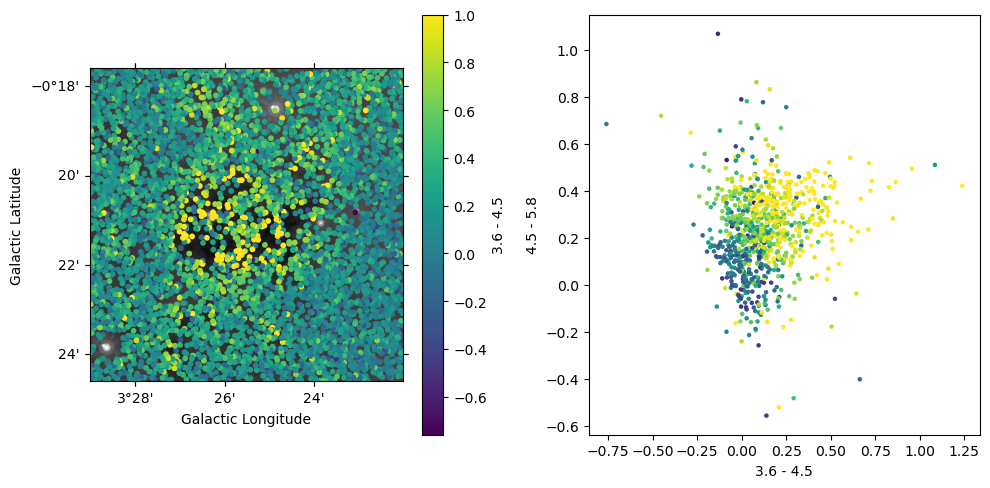

In [92]:
cut_1 = cat_reg.color('3.6', '4.5') > 0.2
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(121, projection=ex1_cut.wcs)
ax.imshow(ex1_cut.data, origin='lower', cmap='gray', norm=simple_norm(ex1_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), s=10, c=cat_reg.color('3.6', '4.5'), cmap='viridis', vmax=1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='3.6 - 4.5')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

ax = plt.subplot(122)
#ax.scatter(cat_reg.color('3.6', '4.5'), cat_reg.color('4.5', '5.8'), s=1, color='k')#, c=cat_reg.color('H', 'K'), cmap='viridis', s=10)
ax.scatter(cat_reg.color('3.6', '4.5'), cat_reg.color('4.5', '5.8'), s=5, c=cat_reg.color('K', '3.6'), vmax=1)#, c=cat_reg.color('H', 'K'), cmap='viridis', s=10)
ax.set_xlabel('3.6 - 4.5')
ax.set_ylabel('4.5 - 5.8')

plt.tight_layout()

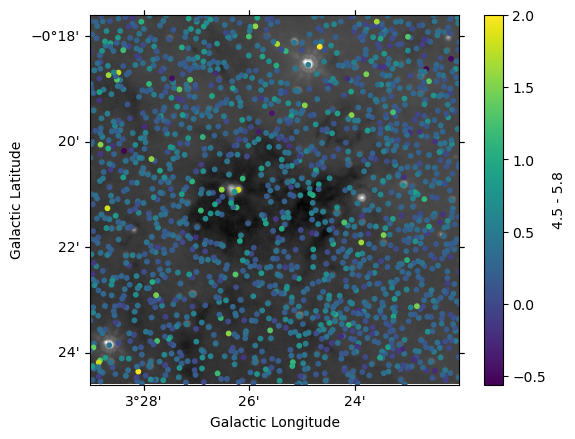

In [64]:
ax = plt.subplot(projection=ex1_cut.wcs)
ax.imshow(ex1_cut.data, origin='lower', cmap='gray', norm=simple_norm(ex1_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), s=10, c=cat_reg.color('4.5', '5.8'), cmap='viridis', vmax=2)#, vmin=0, vmax=0.6)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='4.5 - 5.8')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

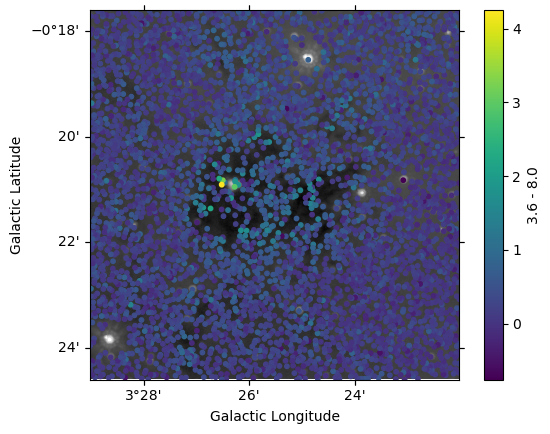

In [67]:
ax = plt.subplot(projection=ex1_cut.wcs)
ax.imshow(ex1_cut.data, origin='lower', cmap='gray', norm=simple_norm(ex1_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), s=10, c=cat_reg.color('3.6', '4.5'), cmap='viridis')#, vmin=0, vmax=0.6)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='3.6 - 8.0')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

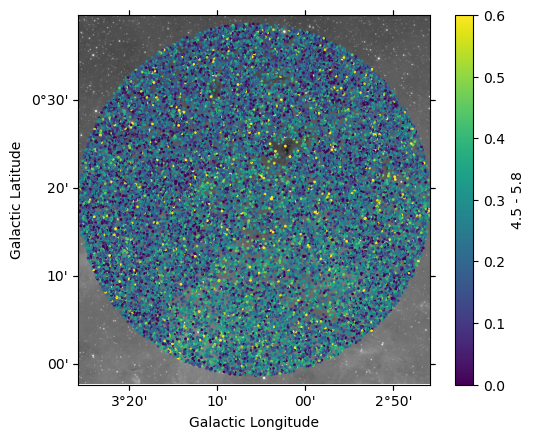

In [35]:
ax = plt.subplot(projection=bc2_cut.wcs)
ax.imshow(bc2_cut.data, origin='lower', cmap='gray', norm=simple_norm(bc2_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), 
                s=1, c=cat_reg.color('4.5', '5.8'), cmap='viridis', vmax=0.6, vmin=0)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='4.5 - 5.8')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

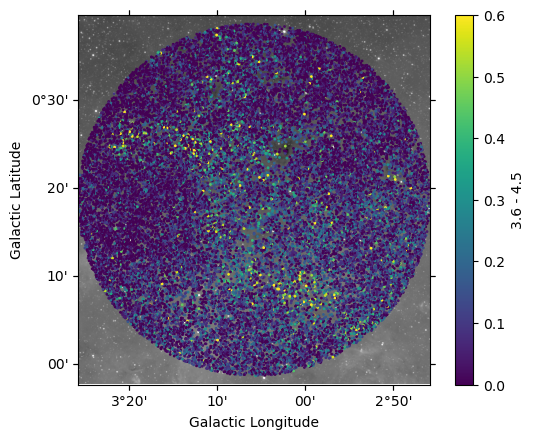

In [83]:
ax = plt.subplot(projection=bc2_cut.wcs)
ax.imshow(bc2_cut.data, origin='lower', cmap='gray', norm=simple_norm(bc2_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), 
                s=1, c=cat_reg.color('3.6', '4.5'), cmap='viridis', vmax=0.6, vmin=0)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='3.6 - 4.5')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

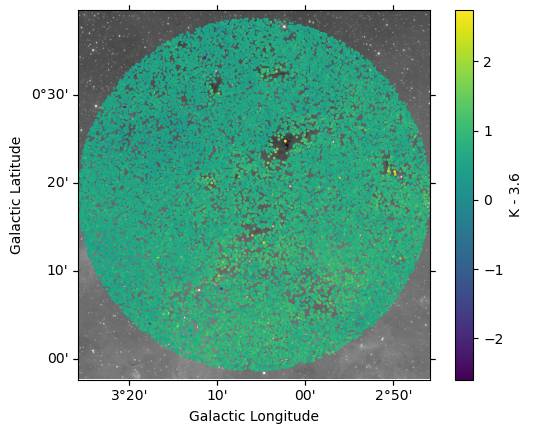

In [85]:
ax = plt.subplot(projection=bc2_cut.wcs)
ax.imshow(bc2_cut.data, origin='lower', cmap='gray', norm=simple_norm(bc2_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(cat_reg.coords.galactic.l, cat_reg.coords.galactic.b, transform=ax.get_transform('world'), 
                s=1, c=cat_reg.color('K', '3.6'), cmap='viridis')#, vmax=0.6, vmin=0)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(im, label='K - 3.6')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

/red/adamginsburg/repos/mpl_plot_templates/mpl_plot_templates/adaptive_param_plot.py:129: UserWarning: The following kwargs were not used by contour: 'markersize'
  con = axis.contour(cx,cy,H.T,levels=levels,norm=norm,cmap=cmap,**kwargs)


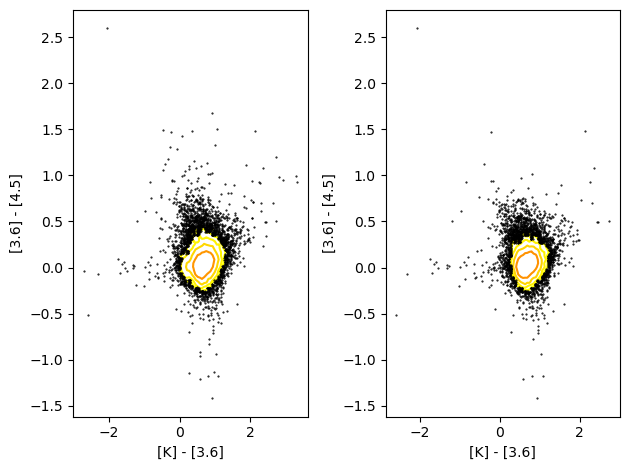

In [64]:
ax = plt.subplot(121)
cat_spitzer.plot_contour_CCD('K', '3.6', '3.6', '4.5', threshold=15, ax=ax)

ax = plt.subplot(122)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_contour_CCD('K', '3.6', '3.6', '4.5', threshold=15, ax=ax)
#ax.set_ylim(-2, 3)
plt.tight_layout()

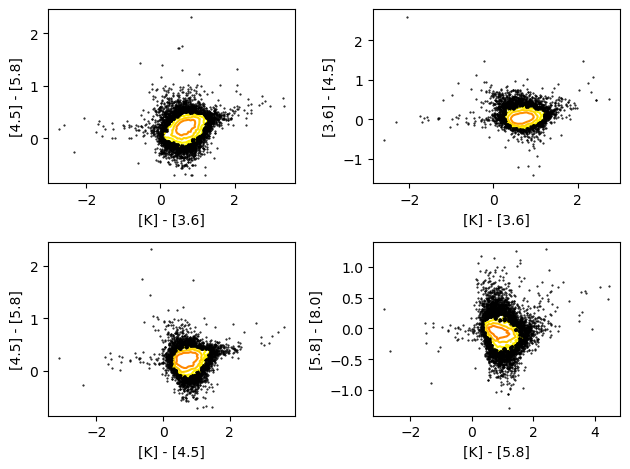

In [65]:
ax = plt.subplot(221) # 3.6, 4.5, 5.8, 8.0
cat_spitzer.plot_contour_CCD('K', '3.6', '4.5', '5.8', threshold=15, ax=ax)

ax = plt.subplot(222)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_contour_CCD('K', '3.6', '3.6', '4.5', threshold=15, ax=ax)
#ax.set_ylim(-2, 3)

ax = plt.subplot(223)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_contour_CCD('K', '4.5', '4.5', '5.8', threshold=15, ax=ax)

ax = plt.subplot(224)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_contour_CCD('K', '5.8', '5.8', '8.0', threshold=15, ax=ax)


plt.tight_layout()

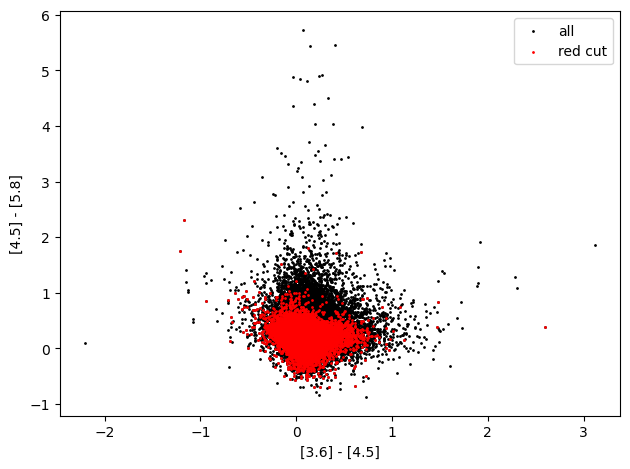

In [66]:
ax = plt.subplot(111)
cat_spitzer.plot_CCD('3.6', '4.5', '4.5', '5.8', ax=ax, s=1, color='k', label='all')

#ax = plt.subplot(122)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_CCD('3.6', '4.5', '4.5', '5.8', ax=ax, s=1, color='red', label='red cut')
#ax.set_ylim(-2, 3)
plt.tight_layout()
plt.legend()

/red/adamginsburg/repos/mpl_plot_templates/mpl_plot_templates/adaptive_param_plot.py:129: UserWarning: The following kwargs were not used by contour: 'markersize'
  con = axis.contour(cx,cy,H.T,levels=levels,norm=norm,cmap=cmap,**kwargs)


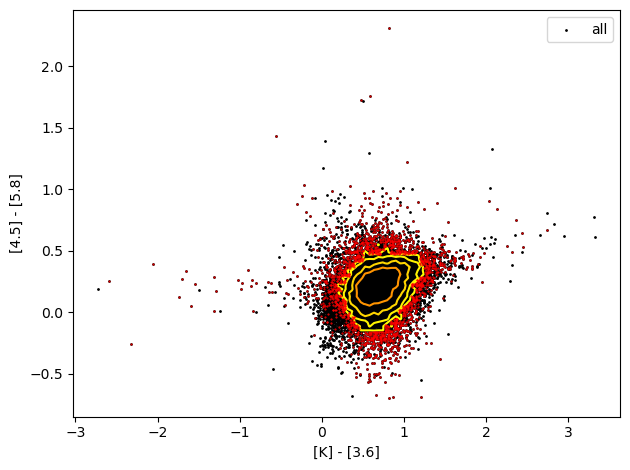

In [72]:
ax = plt.subplot(111)
cat_spitzer.plot_CCD('K', '3.6', '4.5', '5.8', ax=ax, s=1, color='k', label='all')

#ax = plt.subplot(122)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_contour_CCD('K', '3.6', '4.5', '5.8', ax=ax, threshold=10, color='red')
#ax.set_ylim(-2, 3)
plt.tight_layout()
plt.legend()

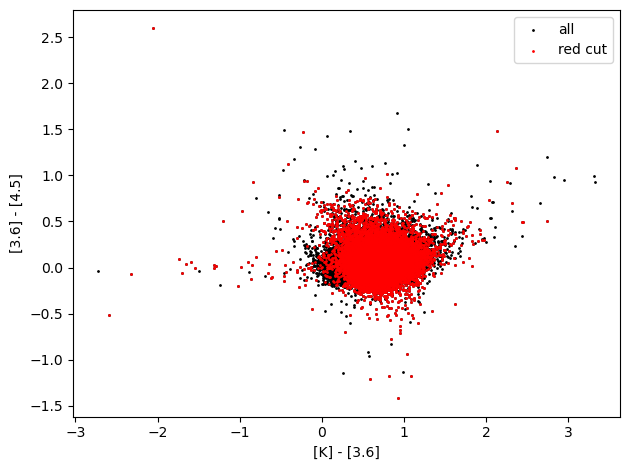

In [67]:
ax = plt.subplot(111)
cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', ax=ax, s=1, color='k', label='all')

#ax = plt.subplot(122)
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_CCD('K', '3.6', '3.6', '4.5', ax=ax, s=1, color='red', label='red cut')
#ax.set_ylim(-2, 3)
plt.tight_layout()
plt.legend()

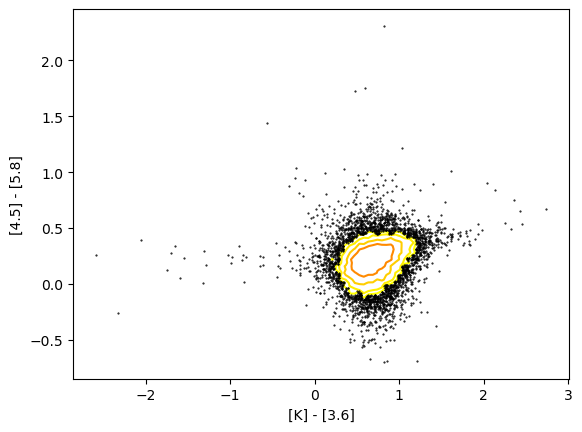

In [68]:
ax = plt.subplot()
#cat_spitzer.plot_CCD('K', '3.6', '3.6', '4.5', color='red', s=2)
cat_reg.plot_contour_CCD('K', '3.6', '4.5', '5.8', threshold=15)
#ax.set_ylim(-2, 3)

In [26]:
# J, H, K, 3.6, 4.5, 5.8, 8.0
bands = ['J', 'H', 'K', '3.6', '4.5', '5.8', '8.0']
band_combinations = [('J', 'H'), ('J', 'K'), ('J', '3.6'), ('J', '4.5'), ('J', '5.8'), ('J', '8.0'), ('H', 'K'), ('H', '3.6'), ('H', '4.5'), ('H', '5.8'), ('H', '8.0'), ('K', '3.6'), ('K', '4.5'), ('K', '5.8'), ('K', '8.0'), ('3.6', '4.5'), ('3.6', '5.8'), ('3.6', '8.0'), ('4.5', '5.8'), ('4.5', '8.0'), ('5.8', '8.0')]
color_combinations = [(band1, band2, band3, band4) for band1, band2 in band_combinations for band3, band4 in band_combinations if band1 != band3 and band2 != band4]
len(color_combinations)

280

In [27]:
280/20

14.0

In [28]:
#fig, axes = plt.subplots(20, 14, figsize=(20, 20))
#
#for i, (band1, band2, band3, band4) in enumerate(color_combinations):
#    ax = axes.flat[i]
#    cat_spitzer.plot_CCD(band1, band2, band3, band4, ax=ax, color='k', alpha=0.1, s=1)
#
#plt.tight_layout()

In [29]:
#fig, axes = plt.subplots(20, 14, figsize=(20, 20))
#
#for i, (band1, band2, band3, band4) in enumerate(color_combinations):
#    ax = axes.flat[i]
#    cat_reg.plot_CCD(band1, band2, band3, band4, ax=ax, color='k', alpha=0.1, s=1)
#
#plt.tight_layout()

In [30]:
from astroquery.xmatch import XMatch

In [31]:
XMatch.clear_cache()


In [32]:
coord_BC2 = SkyCoord(3.0970501246, 0.3112008170, unit=(u.deg, u.deg), frame='galactic')
reg_alt = regions.CircleSkyRegion(center=coord_BC2, radius=20*u.arcmin)

tbl = XMatch.query(cat1='II/316/gps6', cat2='II/293/glimpse', area=reg_alt, max_distance=1*u.arcsec, get_query_payload=True)

In [33]:
tbl = Table.read('/orange/adamginsburg/jwst/cloudc/catalogs/1738094020879A.csv')
tbl.rename_column('jAperMag3', 'Jmag')
tbl.rename_column('hAperMag3', 'Hmag')
tbl.rename_column('k_1AperMag3', 'Kmag')
tbl.rename_column('ra', 'RAJ2000')
tbl.rename_column('dec', 'DEJ2000')
tbl[:3]

<Table length=3>
angDist         JName         RAJ2000   ... q_4.5mag q_5.8mag q_8.0mag
float64         str19         float64   ...   str8     str8     str8  
-------- ------------------- ---------- ... -------- -------- --------
0.246814 J175231.55-262307.8 268.131499 ... 00000400 00000000       --
0.393333 J175230.78-262309.5 268.128271 ... 00000000       --       --
0.036114 J175232.23-262302.6 268.134299 ... 00004040 00000000 00008000

In [34]:
tbl_cat = GlimpseCatalog(tbl)
tbl_cat.catalog[:3]

<Table length=3>
angDist         JName         RAJ2000   ... q_4.5mag q_5.8mag q_8.0mag
float64         str19         float64   ...   str8     str8     str8  
-------- ------------------- ---------- ... -------- -------- --------
0.246814 J175231.55-262307.8 268.131499 ... 00000400 00000000       --
0.393333 J175230.78-262309.5 268.128271 ... 00000000       --       --
0.036114 J175232.23-262302.6 268.134299 ... 00004040 00000000 00008000

(20.0, 11.5)

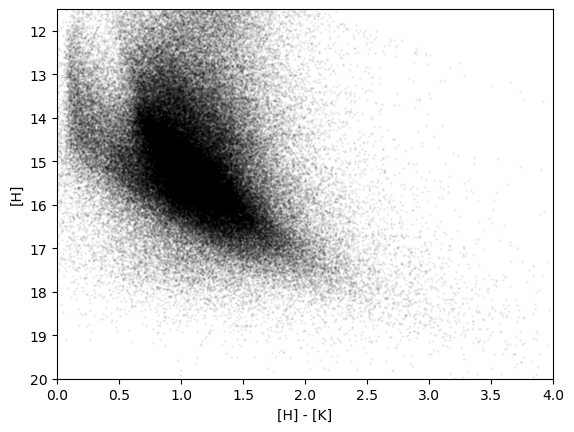

In [35]:
ax = plt.subplot()
tbl_cat.plot_CMD('H', 'K', 'H', color='k', alpha=0.05, s=1, ax=ax)
ax.set_xlim(0, 4)
ax.set_ylim(20, 11.5)

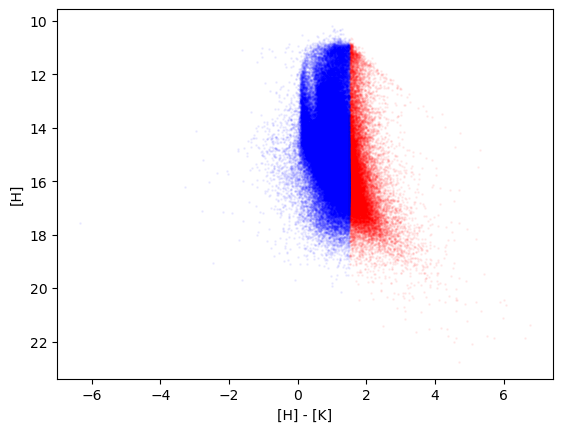

In [36]:
ax = plt.subplot()
tbl_red = GlimpseCatalog(tbl_cat.catalog[tbl_cat.color('H', 'K') > 1.5])
tbl_red.plot_CMD('H', 'K', 'H', color='r', alpha=0.05, s=1, ax=ax)
tbl_blue = GlimpseCatalog(tbl_cat.catalog[tbl_cat.color('H', 'K') < 1.5])
tbl_blue.plot_CMD('H', 'K', 'H', color='b', alpha=0.05, s=1, ax=ax)
plt.gca().invert_yaxis()

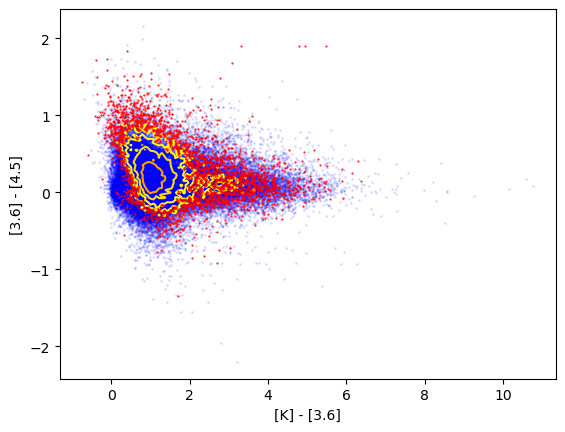

In [37]:
tbl_blue.plot_CCD('K', '3.6', '3.6', '4.5', color='blue', s=1, alpha=0.1)
tbl_red.plot_contour_CCD('K', '3.6', '3.6', '4.5', color='red', s=1, threshold=5)


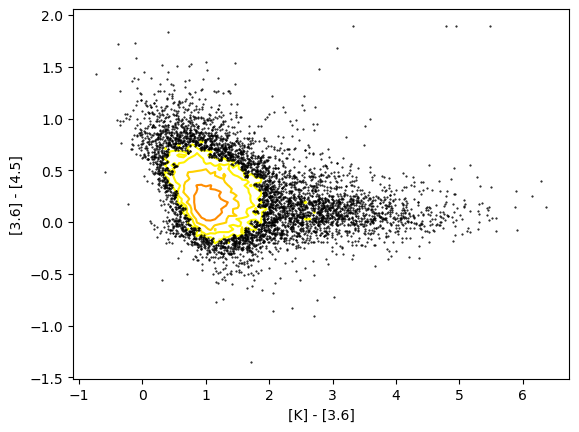

In [38]:
tbl_red.plot_contour_CCD('K', '3.6', '3.6', '4.5', threshold=10)

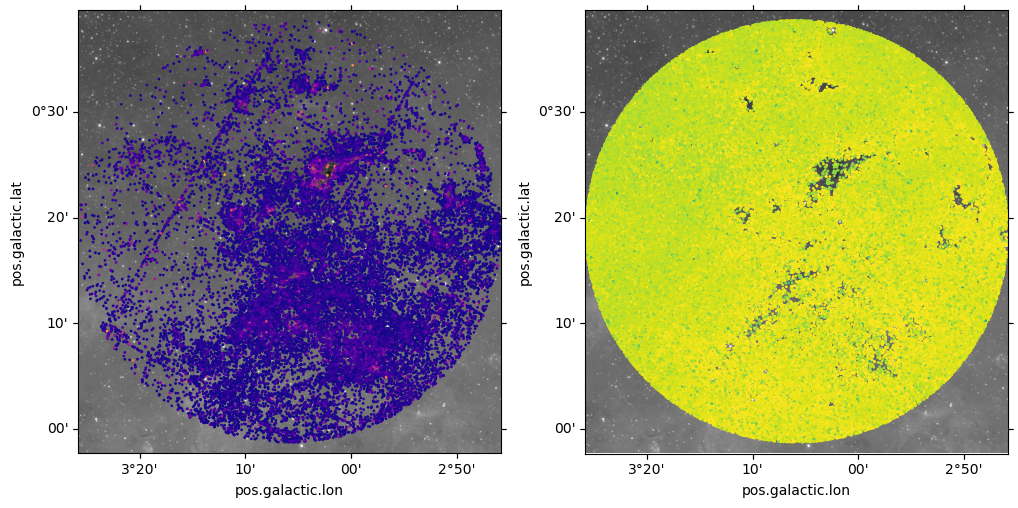

In [39]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection=bc2_cut.wcs)
ax.imshow(bc2_cut.data, origin='lower', cmap='gray', norm=simple_norm(bc2_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(tbl_red.coords.galactic.l, tbl_red.coords.galactic.b, transform=ax.get_transform('world'), s=1, c=tbl_red.color('H', 'K'), cmap='plasma')

ax = plt.subplot(122, projection=bc2_cut.wcs)
ax.imshow(bc2_cut.data, origin='lower', cmap='gray', norm=simple_norm(bc2_cut.data, stretch='log', max_percent=99.99))
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = ax.scatter(tbl_blue.coords.galactic.l, tbl_blue.coords.galactic.b, transform=ax.get_transform('world'), s=1, c=tbl_blue.color('H', 'K'), cmap='viridis')

/red/adamginsburg/repos/mpl_plot_templates/mpl_plot_templates/adaptive_param_plot.py:129: UserWarning: The following kwargs were not used by contour: 'markersize'
  con = axis.contour(cx,cy,H.T,levels=levels,norm=norm,cmap=cmap,**kwargs)


(-0.5, 2.0)

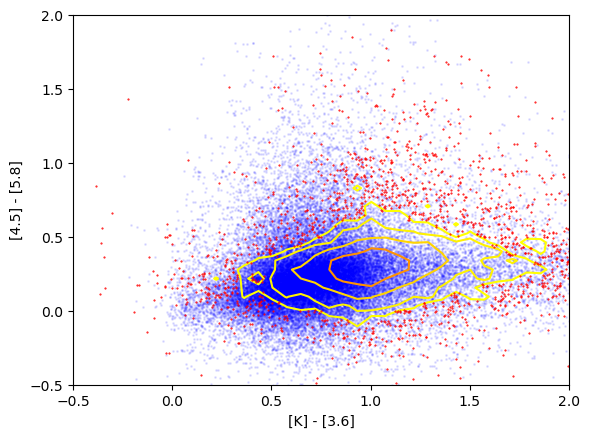

In [ ]:
ax = plt.subplot()
tbl_blue.plot_CCD('K', '3.6', '4.5', '5.8', color='blue', s=1, alpha=0.1, ax=ax)
tbl_red.plot_contour_CCD('K', '3.6', '4.5', '5.8', ax=ax, threshold=10, color='r', s=1)
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)
# what do ices do in CC space? 

(-1.0, 2.0)

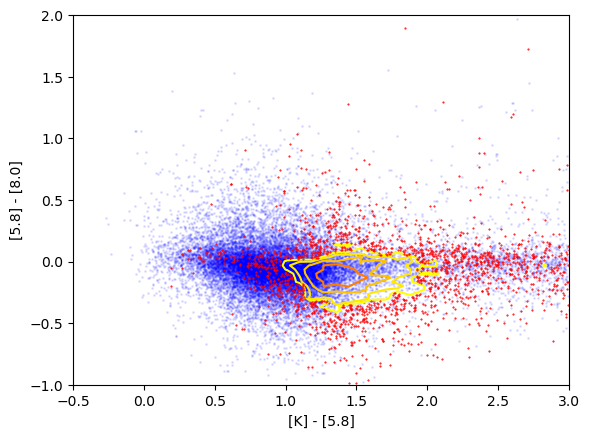

In [41]:
ax = plt.subplot() # 3.6, 4.5, 5.8, 8.0
tbl_blue.plot_CCD('K', '5.8', '5.8', '8.0', color='blue', s=1, alpha=0.1, ax=ax)
tbl_red.plot_contour_CCD('K', '5.8', '5.8', '8.0', ax=ax, threshold=10, color='r', s=1)
ax.set_xlim(-0.5, 3)
ax.set_ylim(-1, 2)

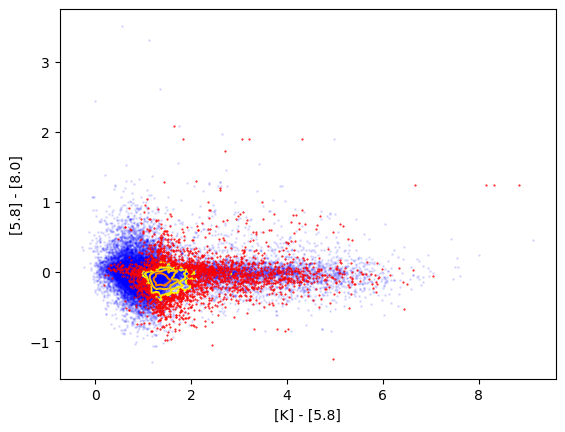

In [42]:
ax = plt.subplot() # 3.6, 4.5, 5.8, 8.0
tbl_blue.plot_CCD('K', '5.8', '5.8', '8.0', color='blue', s=1, alpha=0.1, ax=ax)
tbl_red.plot_contour_CCD('K', '5.8', '5.8', '8.0', ax=ax, threshold=10, color='r', s=1)
#ax.set_xlim(-0.5, 2)
#ax.set_ylim(-0.5, 2)